# Mini-project : Data Analysis for Marketing Strategy

## Task

First load the US Superstore Dataset in a notebook and preprocess it. Then use visualisations to address the following questions:
- Which states have the most sales?
- What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
- Who is an outstanding customer in New York?
- Are there any differences among states in profitability?
- The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit? (Determine if 20% of the customers contribute to 80% of the profit.)
- What are the Top 20 cities by Sales? What about the Top 20 cities by Profit? Are there any difference among cities in profitability? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)
- What are the Top 20 customers by Sales?
- Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales?
- Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
!pip install xlrd


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_excel(r"C:\Users\julie\OneDrive\Documentos\DI-Bootcamp\Week3\Day5\US_Superstore_data.xls")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
duplicate_customers = df.groupby('Customer Name')['Customer ID'].nunique()
duplicate_customers = duplicate_customers[duplicate_customers > 1]
print(duplicate_customers)
print("There are no costumers with same name and different Customer ID.")

Series([], Name: Customer ID, dtype: int64)
There are no costumers with same name and different Customer ID.


This dataframe contains 9994 rows and 21 columns. Since there are no two customers with the same name, I can use Customer Name as an analogue to ID. I'm going to start checking for empty values and duplicate rows.

In [5]:
print(len(df))
df = df.drop_duplicates()
print(len(df))

9994
9994


There are no duplicates

In [6]:
nan_rows = df.isna().any(axis=1)
print([i for i in nan_rows if i == True])

[]


In [7]:
null_rows = df.isnull().any(axis=1)
print([i for i in null_rows if i == True])

[]


There are also no empty values or NaNs.

Now I can begin answering the questions. 

- Which states have the most sales?

There's no "States" column so I can create it myself. I found a city_to_state dictionary online so I created a function in my folder that given a city, returns the state.

In [8]:
from city_to_state import city_to_state

California


In [9]:
city_to_state('Delano')

'California'

It works!

I just saw that there is a column of "States" so there was no need to do this.

In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Let's plot!

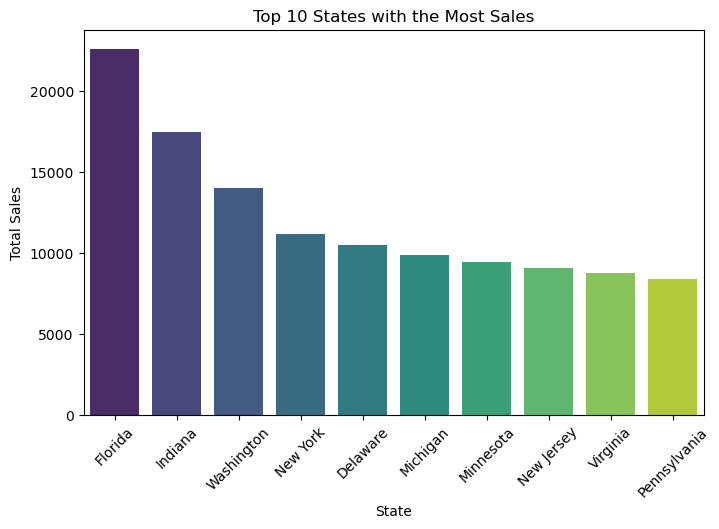

In [11]:
state_sales_sorted = df.sort_values(by='Sales', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(data=state_sales_sorted.head(10), x='State', y='Sales', palette='viridis')
plt.title('Top 10 States with the Most Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

The States with most sales (in decreasing order) are: Florida, Indiana, Washington, New York, Delawere and Michigan.

- What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)

First I will find "Sales" and "Profit" by state.

In [12]:
group_sales_profit = df.groupby('State')['Sales',"Profit"].sum().reset_index()
print(group_sales_profit.head())

        State        Sales      Profit
0     Alabama   19510.6400   5786.8253
1     Arizona   35282.0010  -3427.9246
2    Arkansas   11678.1300   4008.6871
3  California  457687.6315  76381.3871
4    Colorado   32108.1180  -6527.8579


C:\Users\julie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [13]:
print(group_sales_profit[group_sales_profit["State"].isin(['New York', 'California'])])

         State        Sales      Profit
3   California  457687.6315  76381.3871
30    New York  310876.2710  74038.5486


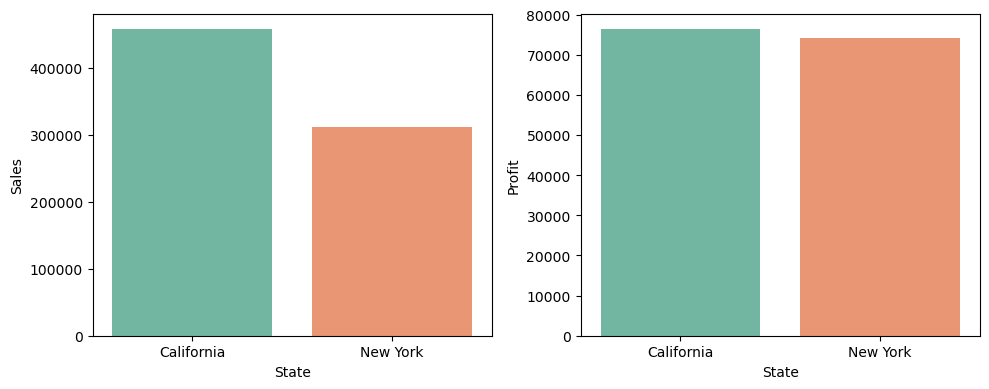

In [14]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x='State', y='Sales', data=group_sales_profit[group_sales_profit["State"].isin(['New York', 'California'])], palette='Set2')
plt.subplot(1, 2, 2)
sns.barplot(x='State', y='Profit', data=group_sales_profit[group_sales_profit["State"].isin(['New York', 'California'])], palette='Set2')
plt.tight_layout()
plt.show()

I need to compare now profit/sales:

In [15]:
cali_profit = group_sales_profit[group_sales_profit["State"]=='California']['Profit']/group_sales_profit[group_sales_profit["State"]=='California']['Sales']
ny_profit   = group_sales_profit[group_sales_profit["State"]=='New York'  ]['Profit']/group_sales_profit[group_sales_profit["State"]=='New York']['Sales']

In [16]:
print(f"Profit in comparison to sales is {(round(cali_profit*100,1)).to_string(index=False)}% in California, whereas in New York it is {(round(ny_profit*100,1)).to_string(index=False)}%.")

Profit in comparison to sales is 16.7% in California, whereas in New York it is 23.8%.


That means that in New York, they make significantly more profit per sale than in California.

- Who is an outstanding customer in New York?

In [17]:
group_sales_customer = df[df["State"]=='New York'].groupby('Customer Name')['Sales'].sum().reset_index()

In [18]:
group_sales_customer.sort_values(by='Sales', ascending = False).head(10)

,Customer Name,Sales
399,Tom Ashbrook,13723.498
319,Peter Fuller,7678.228
360,Seth Vernon,7359.918
400,Tom Boeckenhauer,6999.960
170,Greg Tran,6712.744
398,Todd Sumrall,6492.314
225,Karen Daniels,6241.282
234,Keith Dawkins,5854.194
254,Luke Weiss,5048.186
66,Caroline Jumper,5012.760


In [19]:
ashbrook = group_sales_customer[group_sales_customer["Customer Name"]=="Tom Ashbrook"]["Sales"].to_string(index=False)
ny_sales = group_sales_profit[group_sales_profit["State"]=='New York']["Sales"].to_string(index=False)
ashbrook = float(ashbrook)
ny_sales = float(ny_sales)

In [20]:
print(f"An outstanding custumer in New York is Tom Ashbrook. He is responsible for {round(ashbrook/ny_sales * 100,1)}% of sales in New York.")

An outstanding custumer in New York is Tom Ashbrook. He is responsible for 4.4% of sales in New York.


- Are there any differences among states in profitability?

I already have the `group_sales_profit` dataframe, which groups State with sales and profit. I'll create a new column displaying profit/sales:

In [21]:
group_sales_profit["Profitability"] = group_sales_profit["Profit"]/group_sales_profit["Sales"] *100
group_sales_profit.head()

,State,Sales,Profit,Profitability
0,Alabama,19510.6400,5786.8253,29.659844
1,Arizona,35282.0010,-3427.9246,-9.715789
2,Arkansas,11678.1300,4008.6871,34.326447
3,California,457687.6315,76381.3871,16.688541
4,Colorado,32108.1180,-6527.8579,-20.330864


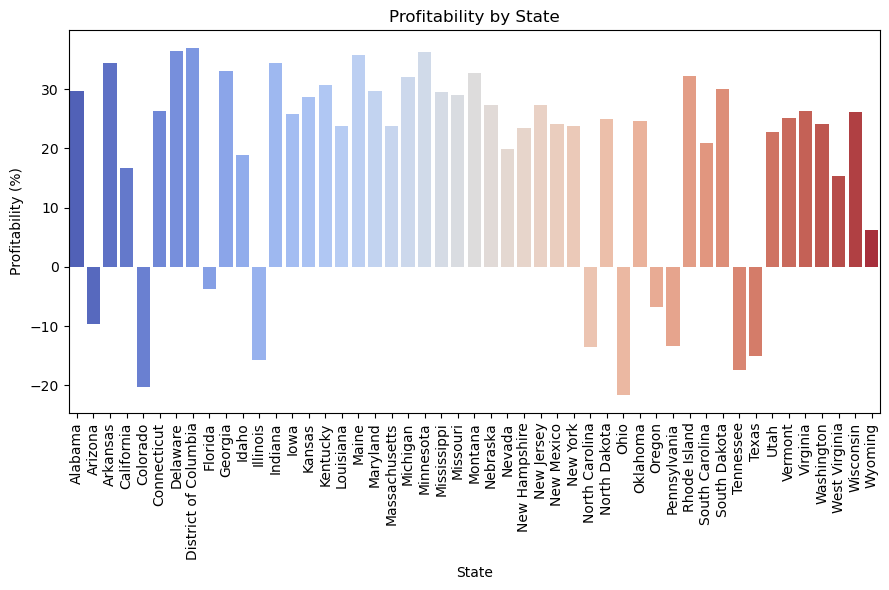

In [36]:
plt.figure(figsize = (9,6))
sns.barplot(group_sales_profit, x='State', y='Profitability', palette='coolwarm')
plt.title('Profitability by State')
plt.xlabel('State')
plt.ylabel('Profitability (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The differences in profitability are shown in the graph above. It is important to notice the difference in profits vs profitability. When considering profitability, the profits are normalized by sales. 
In the graph below, we see that New York and California are States in which most of the profit are made. However, when considering profitability we can take into consideration the efforts that should be done in order to increase sales in States in which the relationship between profit and sales is big, such as Minnesota. State population should also be taken into account. There's a natural limit in the number of sales in scarcely populated areas.

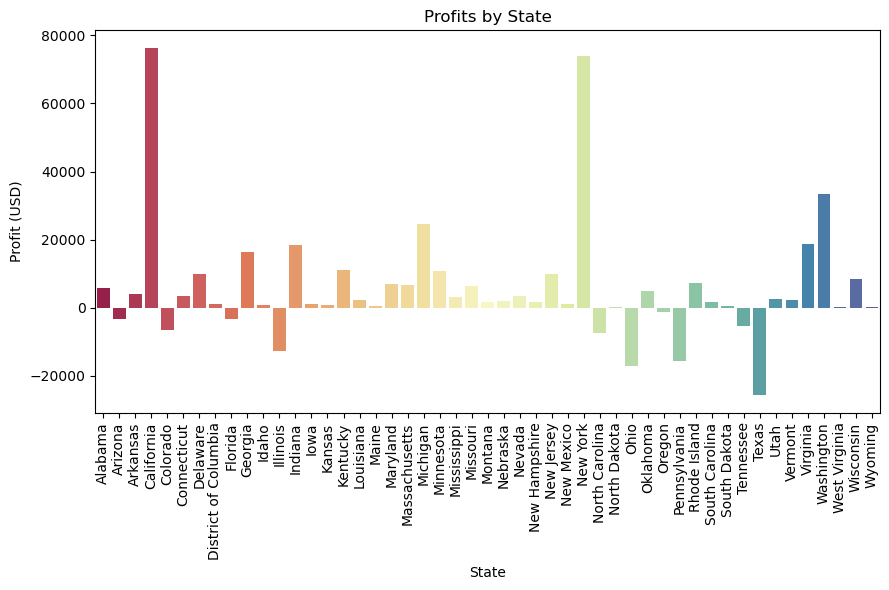

In [35]:
plt.figure(figsize = (9,6))
sns.barplot(group_sales_profit, x='State', y='Profit', palette='Spectral')
plt.title('Profits by State')
plt.xlabel('State')
plt.ylabel('Profit (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Can we apply Pareto principle to Customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)

Let's group the original database by Costumer and sort it in a decreasing sales order:

In [23]:
group_customer = df.groupby('Customer Name')["Profit"].sum().reset_index()
group_customer = group_customer.sort_values(by ="Profit", ascending = False)
group_customer.head()

,Customer Name,Profit
730,Tamara Chand,8981.3239
622,Raymond Buch,6976.0959
671,Sanjit Chand,5757.4119
334,Hunter Lopez,5622.4292
6,Adrian Barton,5444.8055


I can now sum over the first 20% elements of the Profit column:

In [24]:
customers20 = sum(list(group_customer["Profit"])[i] for i in range(int(0.2*len(group_customer["Profit"]))))
print(f"20% of customers contribute with {int(customers20)} USD.")
contribution=int(customers20/sum(list(group_customer["Profit"]))*100)

20% of customers contribute with 233201 USD.


In [25]:
profit80 = sum(list(group_customer["Profit"]))*0.8
print(f"Whereas the 80% of the total profit is {int(profit80)} USD.")
print(f"In other words, 20% of customers contribute {contribution}% of the total profit")

Whereas the 80% of the total profit is 229117 USD.
In other words, 20% of customers contribute 81% of the total profit


The Pareto Rule applies.

- What are the Top 20 cities by Sales? What about the Top 20 cities by Profit? Are there any difference among cities in profitability? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)

Now we have to group cities by "Sales" and "Profit", and we should add once more a "Profitability" column. Let's repeat that process.

In [26]:
group_city_sales_profit = df.groupby('City')['Sales',"Profit"].sum().reset_index()
group_city_sales_profit["Profitability"] = group_city_sales_profit["Profit"]/group_city_sales_profit["Sales"] *100

C:\Users\julie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [27]:
citiesprofit = group_city_sales_profit.sort_values(by ="Profit", ascending = False).head(20)

In [28]:
citiessales = group_city_sales_profit.sort_values(by ="Sales", ascending = False).head(20)

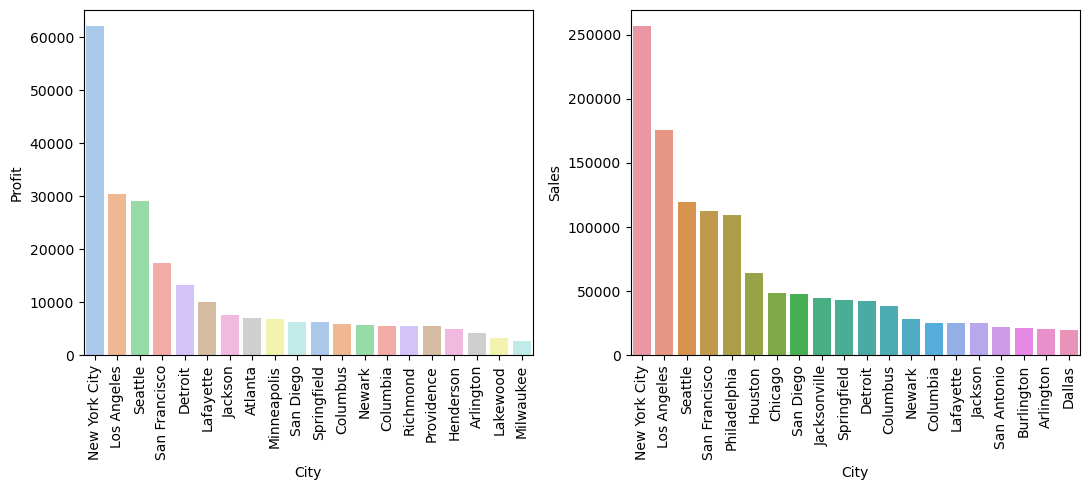

In [29]:
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
sns.barplot(x= "City", y = "Profit", data = citiesprofit, palette='pastel' )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x= "City", y = "Sales", data = citiessales)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

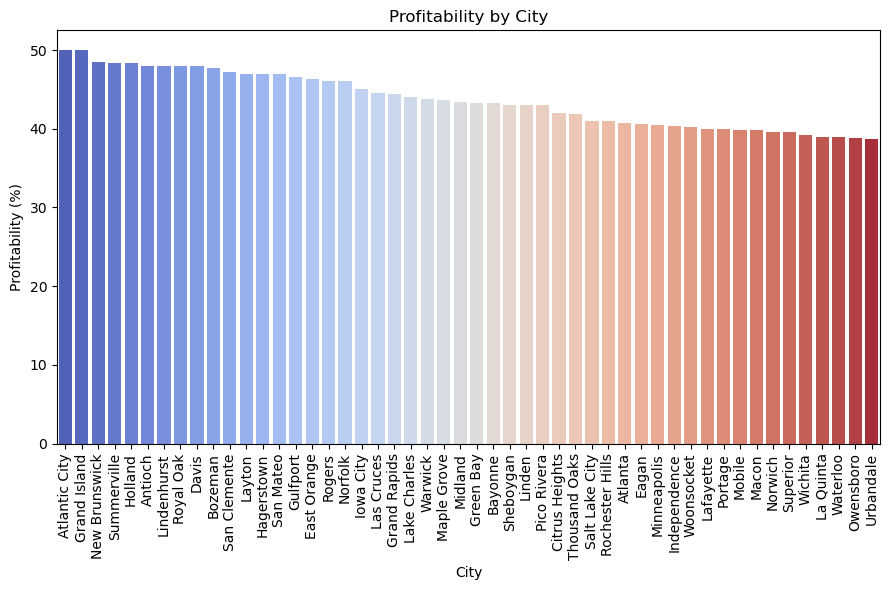

In [40]:
citiesprofitability = group_city_sales_profit.sort_values(by ="Profitability", ascending = False).head(50)
plt.figure(figsize = (9,6))
sns.barplot(citiesprofitability, x='City', y='Profitability', palette='coolwarm')
plt.title('Profitability by City')
plt.xlabel('City')
plt.ylabel('Profitability (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- What are the Top 20 customers by Sales?

In [30]:
group_customers  = df.groupby('Customer Name')['Sales'].sum().reset_index()
group_customers20=  group_customers.sort_values(by="Sales", ascending = False).head(20)
print(group_customers20)

          Customer Name      Sales
686         Sean Miller  25043.050
730        Tamara Chand  19052.218
622        Raymond Buch  15117.339
757        Tom Ashbrook  14595.620
6         Adrian Barton  14473.571
441        Ken Lonsdale  14175.229
671        Sanjit Chand  14142.334
334        Hunter Lopez  12873.298
672        Sanjit Engle  12209.438
156  Christopher Conant  12129.072
756        Todd Sumrall  11891.751
312           Greg Tran  11820.120
75         Becky Martin  11789.630
689         Seth Vernon  11470.950
132     Caroline Jumper  11164.974
169         Clay Ludtke  10880.546
486       Maria Etezadi  10663.728
417      Karen Ferguson  10604.266
90         Bill Shonely  10501.653
249        Edward Hooks  10310.880


These are the top 20 customers by sales. Let's plot!

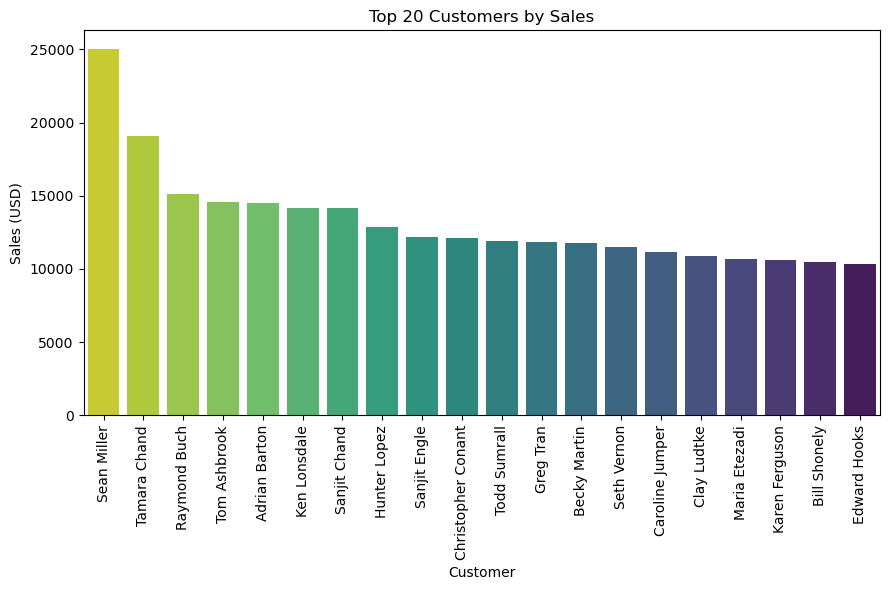

In [31]:
plt.figure(figsize = (9,6))
sns.barplot(group_customers20, x='Customer Name', y='Sales', palette='viridis_r')
plt.title('Top 20 Customers by Sales')
plt.xlabel('Customer')
plt.ylabel('Sales (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales?

In [32]:
group_customers20["Cumulative Sales"] = group_customers20["Sales"].cumsum()

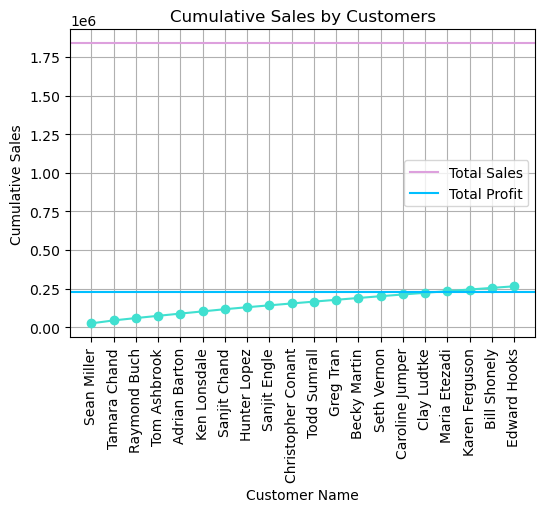

In [33]:
plt.figure(figsize=(6, 4))
plt.plot(group_customers20['Customer Name'], group_customers20["Cumulative Sales"] , marker='o', color = "turquoise")
plt.title('Cumulative Sales by Customers')
plt.xlabel('Customer Name')
plt.ylabel('Cumulative Sales')
plt.grid()
plt.xticks(rotation = 90)
plt.axhline(y = 0.8*sum(list(df["Sales"])), label = 'Total Sales', color = "plum")
plt.axhline(y = 0.8*sum(list(df["Profit"])), label = 'Total Profit', color = 'deepskyblue')
plt.legend()
plt.show()

We can't apply the Pareto rule to sales and customers, but as mentioned before, it is possible to apply to profit and customers.

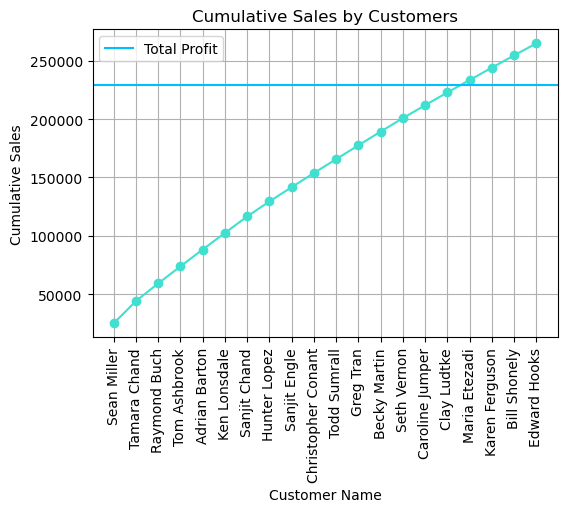

In [34]:
plt.figure(figsize=(6, 4))
plt.plot(group_customers20['Customer Name'], group_customers20["Cumulative Sales"] , marker='o', color = "turquoise")
plt.title('Cumulative Sales by Customers')
plt.xlabel('Customer Name')
plt.ylabel('Cumulative Sales')
plt.grid()
plt.xticks(rotation = 90)
plt.axhline(y = 0.8*sum(list(df["Profit"])), label = 'Total Profit', color = 'deepskyblue')
plt.legend()
plt.show()

- Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.


Superstore should prioritize cities and states with both high profits and high sales (such as NYC, LA, New York and California) but also states and densely populated cities with high profits but not necessarily high sales, such as Minessota or Atlanta.
At cities where sales are high and profit is low, the company should investigate factors affecting profit rates and increase efficiency.